In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Read the data
df = pd.read_csv('/content/food_index.csv')

In [ ]:
df

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,1983-9,61.6,85.5,39.2,55.7,45.50,74.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1983-10,61.4,86.2,39.2,52.5,43.80,67.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1983-11,63.2,87.6,39.2,52.8,43.72,68.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983-12,62.8,84.4,36.8,52.4,45.37,60.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-01,62.4,80.5,38.1,52.6,44.79,62.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-08,121.7,122.0,131.3,110.2,136.10,113.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,2024-09,124.6,119.9,136.5,113.6,142.40,126.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,2024-10,126.9,119.2,139.0,114.4,152.70,129.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,2024-11,127.6,118.5,139.9,111.4,164.10,126.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Date                  0
Food Price Index      0
Meat                  0
Dairy                 0
Cereals               0
                   ... 
Unnamed: 61         496
Unnamed: 62         496
Unnamed: 63         496
Unnamed: 64         496
Unnamed: 65         199
Length: 66, dtype: int64


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df
# 1. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Date                0
Food Price Index    0
Meat                0
Dairy               0
Cereals             0
Oils                0
Sugar               0
dtype: int64


In [ ]:
df

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
0,1983-9,61.6,85.5,39.2,55.7,45.50,74.2
1,1983-10,61.4,86.2,39.2,52.5,43.80,67.6
2,1983-11,63.2,87.6,39.2,52.8,43.72,68.5
3,1983-12,62.8,84.4,36.8,52.4,45.37,60.8
4,1984-01,62.4,80.5,38.1,52.6,44.79,62.3
...,...,...,...,...,...,...,...
491,2024-08,121.7,122.0,131.3,110.2,136.10,113.9
492,2024-09,124.6,119.9,136.5,113.6,142.40,126.3
493,2024-10,126.9,119.2,139.0,114.4,152.70,129.6
494,2024-11,127.6,118.5,139.9,111.4,164.10,126.4


In [ ]:
# Fill missing values with forward fill method (carries last valid value forward)
df = df.ffill()

In [ ]:
# 2. Parse dates
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

In [ ]:
# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
# 3. Normalize the numerical columns
price_columns = ['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[price_columns]),
    columns=[f"{col}_normalized" for col in price_columns],
    index=df.index
)
df = pd.concat([df, df_scaled], axis=1)

In [ ]:
# 4. Handle outliers using IQR method
for column in price_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with median
    median_val = df[column].median()
    df[f"{column}_clean"] = df[column].clip(lower_bound, upper_bound)

In [ ]:
# 5. Create derived features
# Calculate component ratios
for component in ['Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']:
    df[f'{component}_Ratio'] = df[component] / df['Food Price Index']

In [ ]:
# Calculate monthly averages
monthly_avg = df.groupby('Month')['Food Price Index'].mean()

In [ ]:
# 6. Remove duplicates
df = df.drop_duplicates()


In [ ]:
# 7. Create smoothed versions using rolling averages
window_size = 3
for column in price_columns:
    df[f"{column}_MA{window_size}"] = df[column].rolling(window=window_size).mean()

In [ ]:
# 8. Log transformation for price data
for column in price_columns:
    df[f"{column}_log"] = np.log(df[column])

In [ ]:
# 9. Calculate month-over-month changes
for column in price_columns:
    df[f"{column}_mom_change"] = df[column].pct_change()

In [ ]:
# 10. Clean up column names
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# Create year-month index for better time series analysis
df['YearMonth'] = df['Date'].dt.to_period('M')
df.set_index('YearMonth', inplace=True)

In [ ]:
df

,Date,Food_Price_Index,Meat,Dairy,Cereals,Oils,Sugar,Year,Month,Food_Price_Index_normalized,...,Dairy_log,Cereals_log,Oils_log,Sugar_log,Food_Price_Index_mom_change,Meat_mom_change,Dairy_mom_change,Cereals_mom_change,Oils_mom_change,Sugar_mom_change
YearMonth,,,,,,,,,,,,,,,,,,,,,
1983-09,1983-09-01,61.6,85.5,39.2,55.7,45.50,74.2,1983,9,0.098720,...,3.668677,4.019980,3.817712,4.306764,NaN,NaN,NaN,NaN,NaN,NaN
1983-10,1983-10-01,61.4,86.2,39.2,52.5,43.80,67.6,1983,10,0.096892,...,3.668677,3.960813,3.779634,4.213608,-0.003247,0.008187,0.000000,-0.057451,-0.037363,-0.088949
1983-11,1983-11-01,63.2,87.6,39.2,52.8,43.72,68.5,1983,11,0.113346,...,3.668677,3.966511,3.777806,4.226834,0.029316,0.016241,0.000000,0.005714,-0.001826,0.013314
1983-12,1983-12-01,62.8,84.4,36.8,52.4,45.37,60.8,1983,12,0.109689,...,3.605498,3.958907,3.814851,4.107590,-0.006329,-0.036530,-0.061224,-0.007576,0.037740,-0.112409
1984-01,1984-01-01,62.4,80.5,38.1,52.6,44.79,62.3,1984,1,0.106033,...,3.640214,3.962716,3.801985,4.131961,-0.006369,-0.046209,0.035326,0.003817,-0.012784,0.024671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,2024-08-01,121.7,122.0,131.3,110.2,136.10,113.9,2024,8,0.648080,...,4.877485,4.702297,4.913390,4.735321,0.006617,0.016667,0.026583,-0.004517,0.008148,-0.046862
2024-09,2024-09-01,124.6,119.9,136.5,113.6,142.40,126.3,2024,9,0.674589,...,4.916325,4.732684,4.958640,4.838660,0.023829,-0.017213,0.039604,0.030853,0.046289,0.108867
2024-10,2024-10-01,126.9,119.2,139.0,114.4,152.70,129.6,2024,10,0.695612,...,4.934474,4.739701,5.028475,4.864453,0.018459,-0.005838,0.018315,0.007042,0.072331,0.026128


# VISUALIZATION PART

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

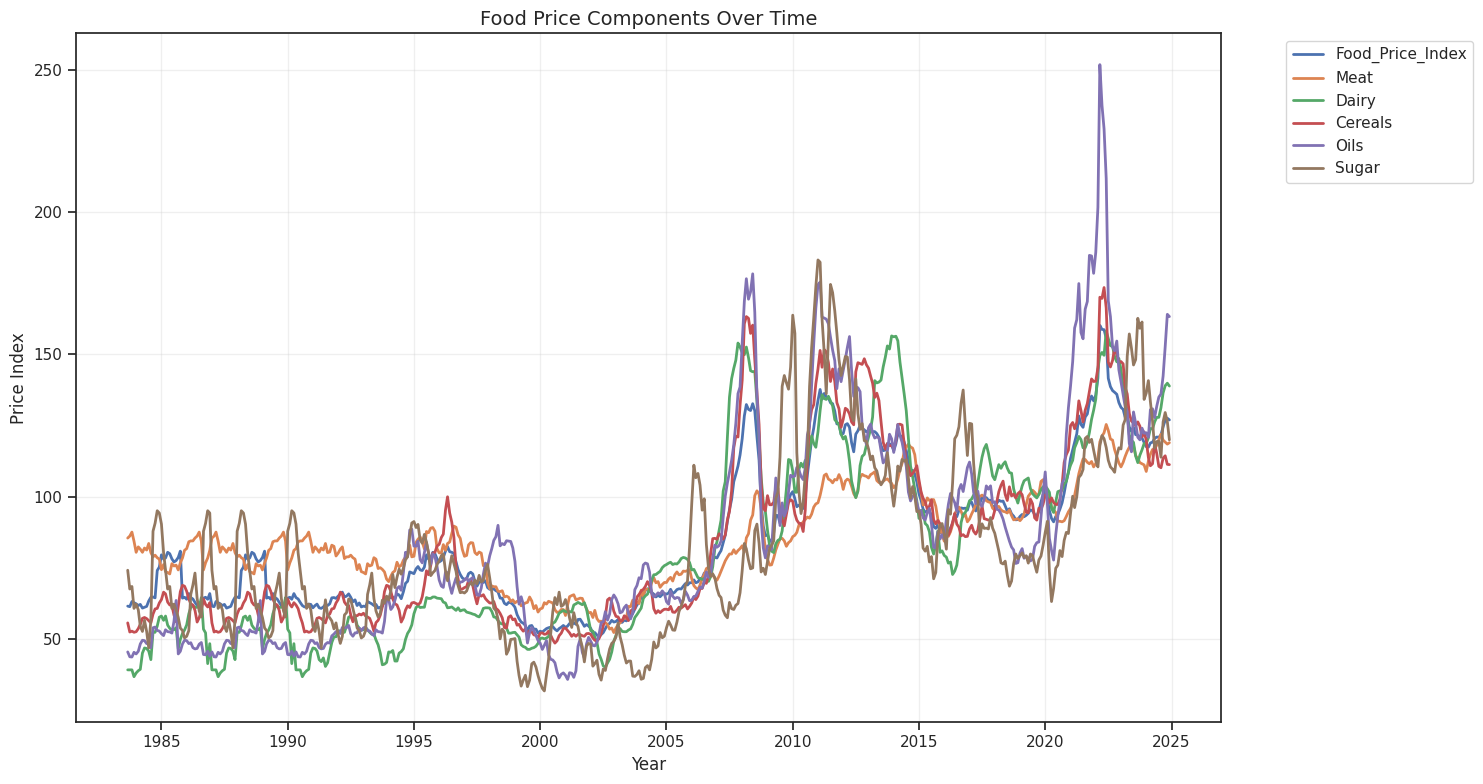

In [ ]:
# 1. Line Plot - Time Series of All Components
plt.figure(figsize=(15, 8))
for column in ['Food_Price_Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']:
    # Convert the index to timestamps for plotting
    plt.plot(df.index.to_timestamp(), df[column], label=column, linewidth=2)
plt.title('Food Price Components Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price Index', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

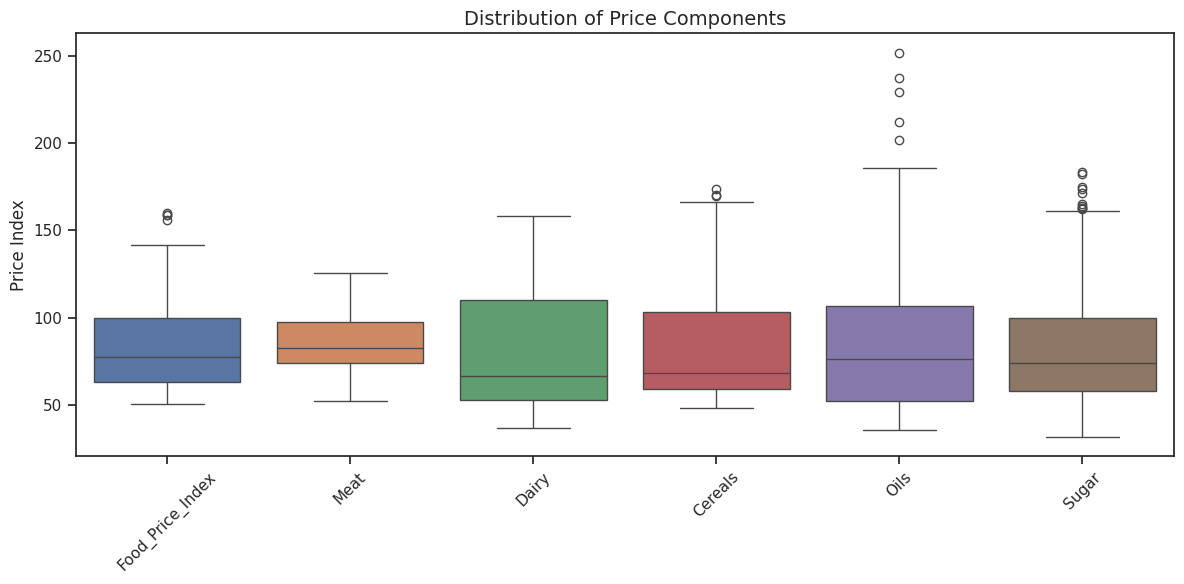

In [ ]:
# 2. Box Plot - Distribution of Components
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Food_Price_Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']])
plt.title('Distribution of Price Components', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Price Index')
plt.tight_layout()
plt.show()

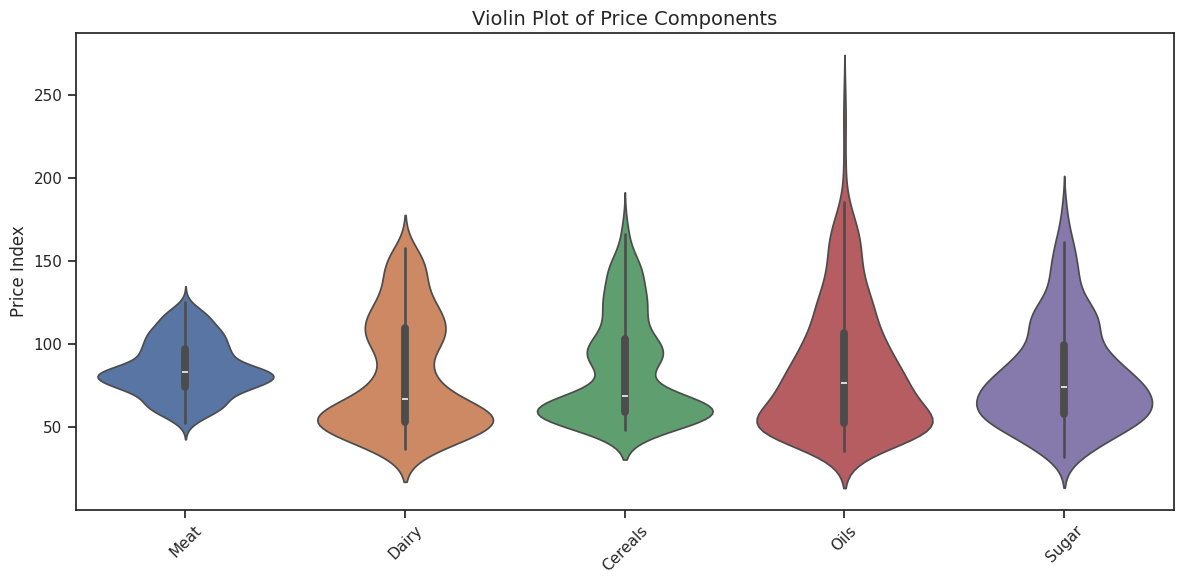

In [ ]:
# 3. Violin Plot - Component Distribution Comparison
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']])
plt.title('Violin Plot of Price Components', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Price Index')
plt.tight_layout()
plt.show()

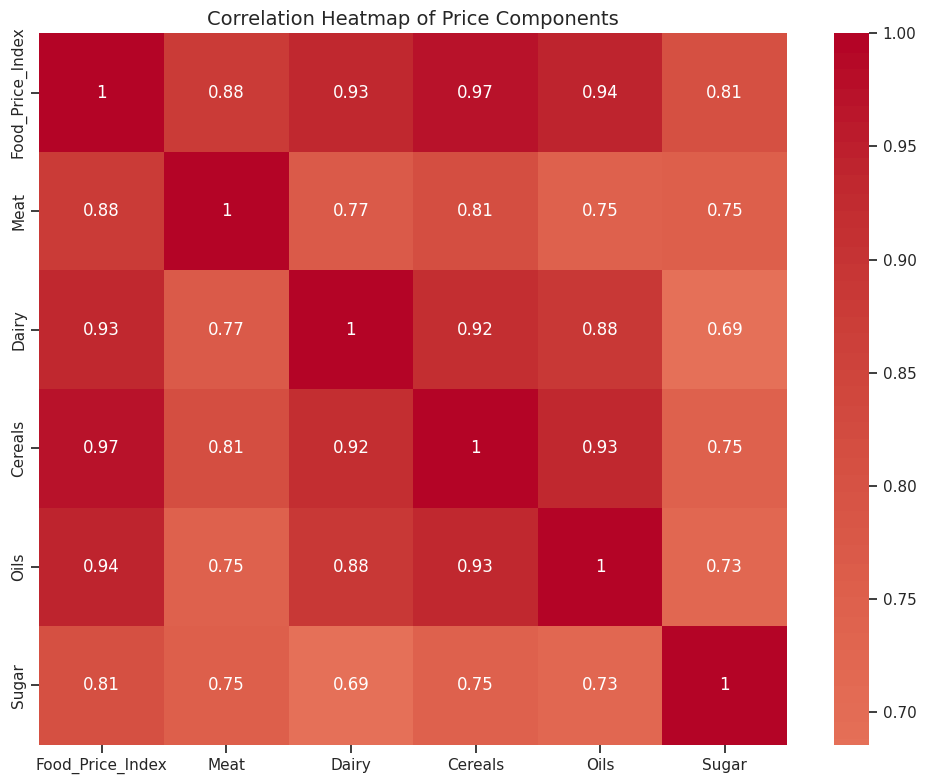

In [ ]:
# 4. Heatmap - Correlation Matrix
plt.figure(figsize=(10, 8))
correlation = df[['Food_Price_Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Price Components', fontsize=14)
plt.tight_layout()
plt.show()

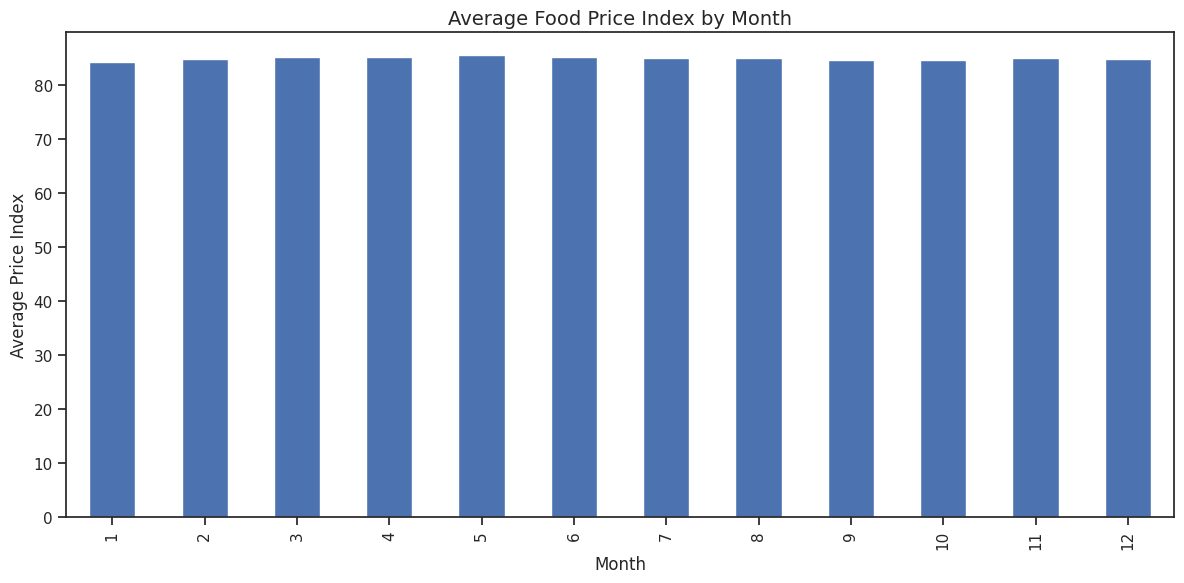

In [ ]:
# 5. Bar Plot - Monthly Averages
monthly_avg = df.groupby('Month')[['Food_Price_Index']].mean()
plt.figure(figsize=(12, 6))
monthly_avg['Food_Price_Index'].plot(kind='bar')
plt.title('Average Food Price Index by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Price Index')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

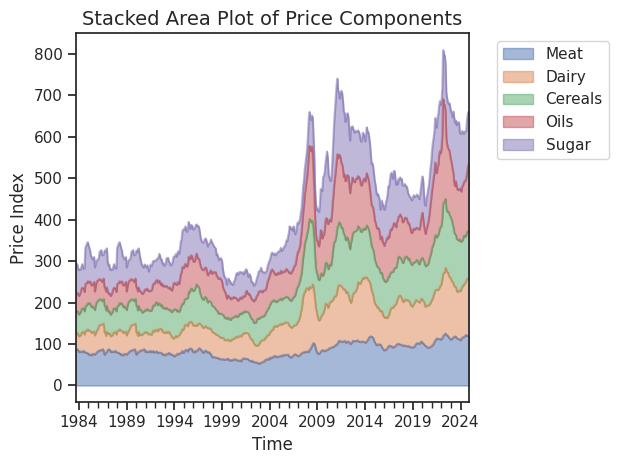

In [ ]:
# 6. Area Plot - Stacked Component Visualization
plt.figure(figsize=(15, 8))
df[['Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']].plot.area(alpha=0.5)
plt.title('Stacked Area Plot of Price Components', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

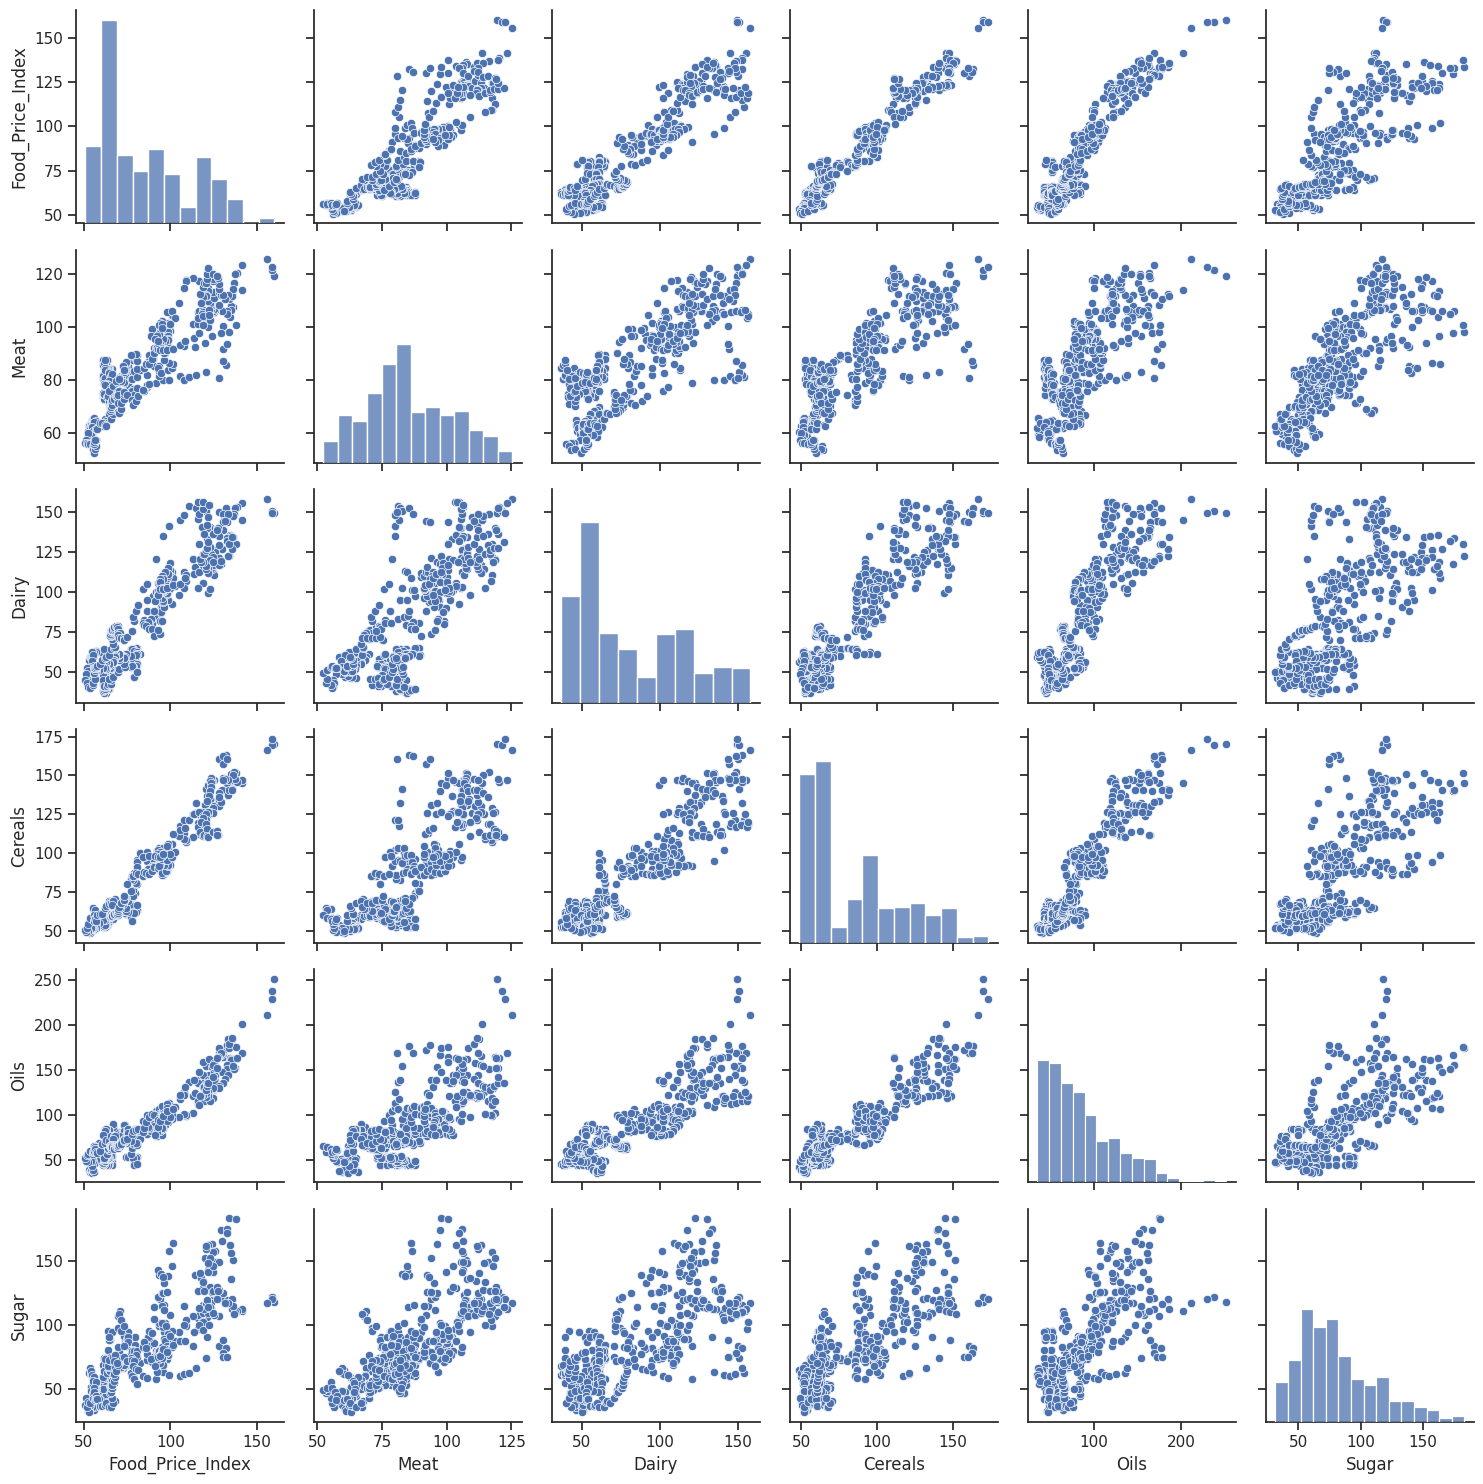

In [ ]:
# 8. Scatter Matrix
sns.set(style="ticks")
plt.figure(figsize=(15, 15))
sns.pairplot(df[['Food_Price_Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']])
plt.tight_layout()
plt.show()

In [ ]:
# 9. Seasonal Decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Food_Price_Index'], period=12)

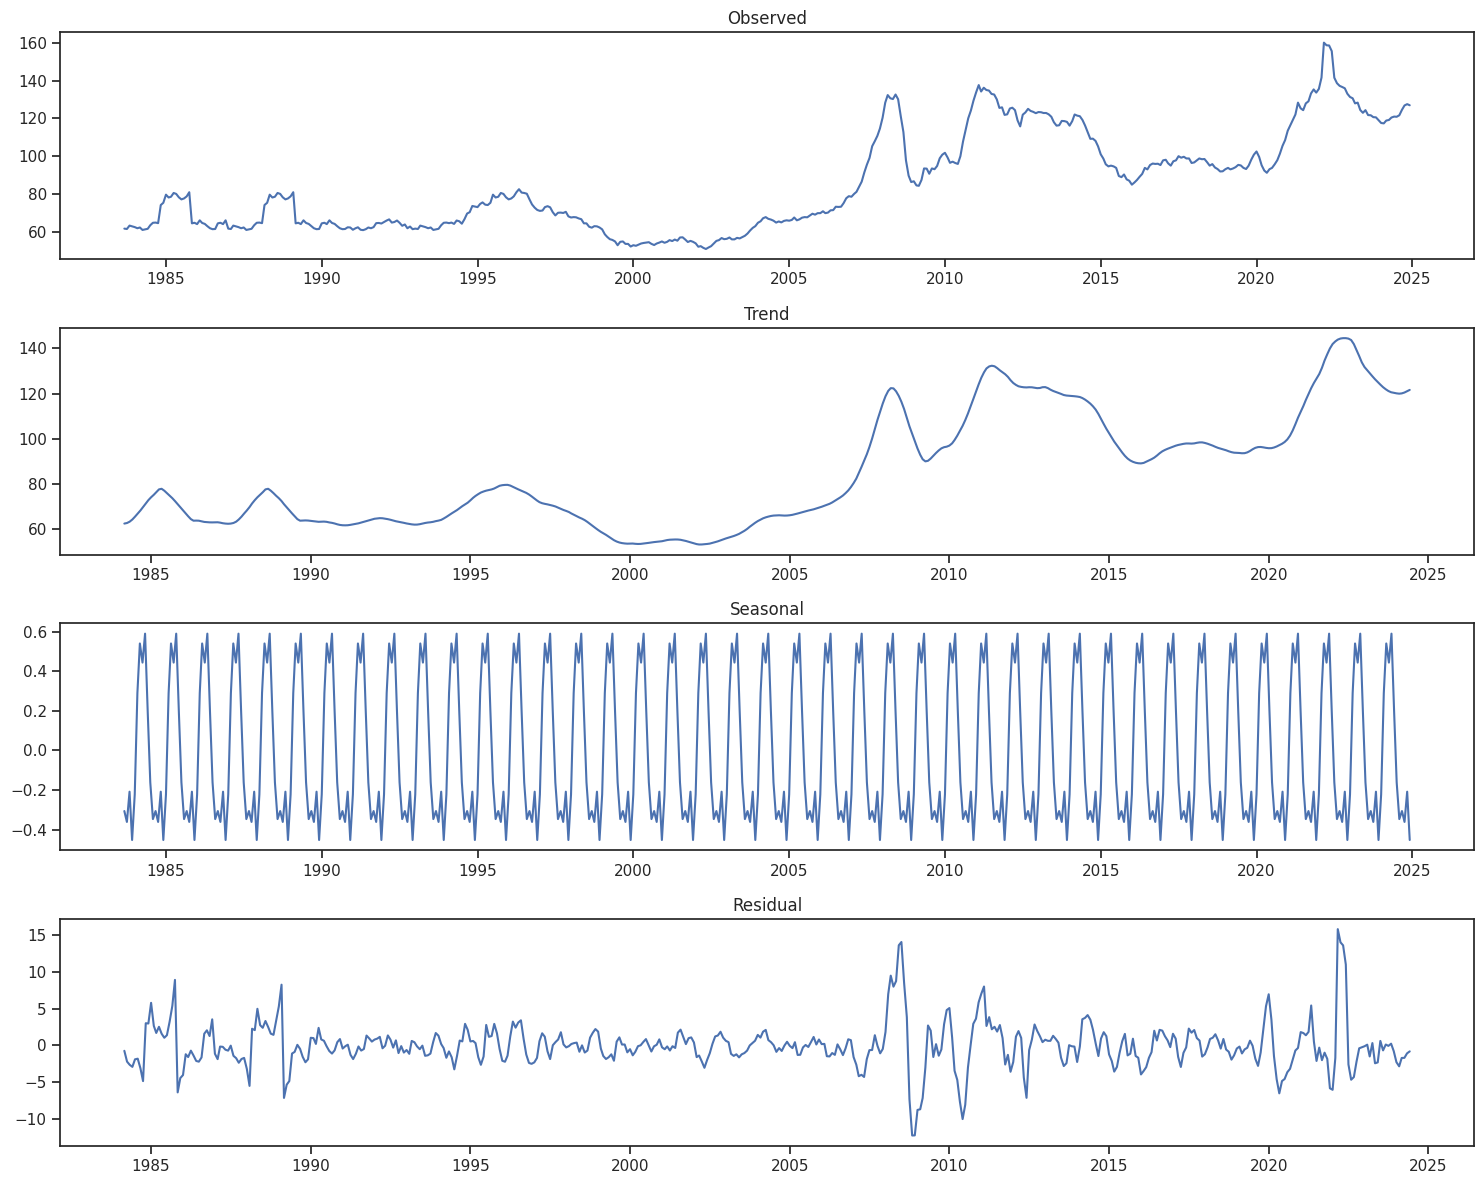

In [ ]:
# Plot decomposition
plt.figure(figsize=(15, 12))
plt.subplot(411)
# Convert the index to timestamps for plotting
plt.plot(decomposition.observed.index.to_timestamp(), decomposition.observed)
plt.title('Observed')
plt.subplot(412)
# Convert the index to timestamps for plotting
plt.plot(decomposition.trend.index.to_timestamp(), decomposition.trend)
plt.title('Trend')
plt.subplot(413)
# Convert the index to timestamps for plotting
plt.plot(decomposition.seasonal.index.to_timestamp(), decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
# Convert the index to timestamps for plotting
plt.plot(decomposition.resid.index.to_timestamp(), decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

In [ ]:
# 10. Radar Chart for Component Comparison
def create_radar_chart(data_point):
    categories = ['Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']
    values = data_point[categories].values.flatten().tolist()
    values.append(values[0])

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title('Radar Chart of Price Components')
    plt.show()

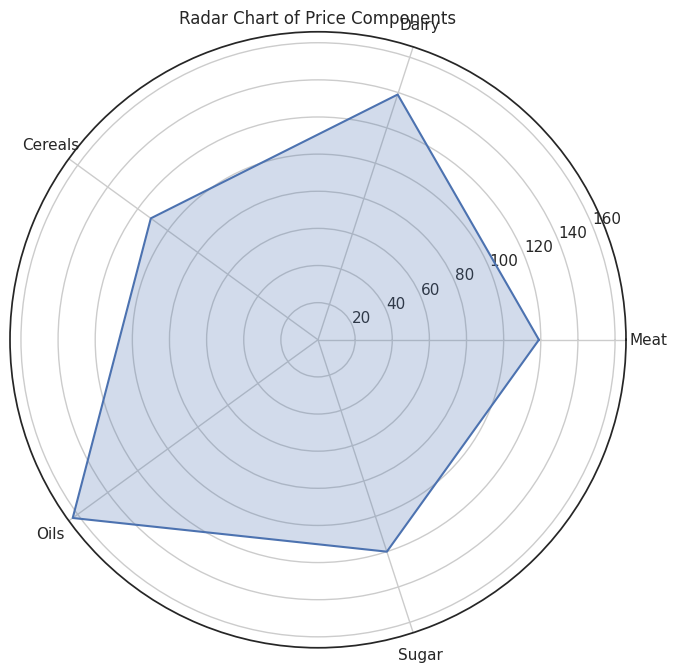

In [ ]:
# Create radar chart for the most recent data point
create_radar_chart(df.iloc[-1])